In [1]:
from urllib.request import urlretrieve  
import pandas as pd
import numpy as np
import itertools
from bs4 import BeautifulSoup
import requests
import time

In [63]:
pop = pd.read_csv('/Users/yang/Downloads/population_communes.csv', sep = ',')
sur = pd.read_csv('/Users/yang/Downloads/surface_departements.csv', sep = ',')
#A=pd.read_csv('/Users/yang/Downloads/rpps-medecins18-tab1v3_87301590207856.csv', sep = ',')

###DONNEES - Effectifs des mÈdecins"
#"ANNEE - 2018"
#"SEXE - Ensemble tous sexes confondus"
#"AGE - Ensemble tous ‚ges confondus"

#MODE EXERCICE,"Ensemble des modes d'exercice","LibÈraux exclusifs","Mixtes","SalariÈs hospitaliers","Autres salariÈs"
#"SPECIALITE","###

In [64]:
pop.head()

,Code département,Code canton,Code arrondissement,Code région,Nom de la commune,Code commune,Nom de la région,variable,value
0,64,27.0,3,75,Aast,1,Nouvelle-Aquitaine,Population totale,184
1,64,27.0,3,75,Aast,1,Nouvelle-Aquitaine,Population municipale,177
2,55,10.0,2,44,Abainville,1,Grand Est,Population totale,310
3,55,10.0,2,44,Abainville,1,Grand Est,Population municipale,305
4,60,11.0,1,32,Abancourt,1,Hauts-de-France,Population totale,658


In [69]:
#pop1=pop[pop.variable=='Population totale']
pop1=pop
pop1=pop1.pivot_table(columns='variable',values='value',index='Code département')
pop1.head(200)

variable,Population municipale,Population totale
Code département,,
01,1568.611794,1609.756757
02,666.835821,683.565920
03,1070.611987,1102.006309
04,821.035354,845.106061
05,865.687117,896.613497
06,6648.490798,6739.503067
07,959.165192,986.994100
08,609.227876,626.115044
09,462.438066,477.960725


In [4]:
sur.head()

,code_insee,nom,surf_km2
0,974,La Réunion,2505.0
1,11,Aude,6343.0
2,43,Haute-Loire,5003.0
3,13,Bouches-du-Rhône,5247.0
4,47,Lot-et-Garonne,5385.0


In [47]:
deptpop = pop1.groupby('Code département').sum()#.value
deptpop=deptpop.merge(sur,left_on='Code département',right_on='code_insee')
deptpop['density']=deptpop.value/deptpop.surf_km2

In [48]:
deptpop.head(20)

,Code canton,Code arrondissement,Code région,Code commune,value,code_insee,nom,surf_km2,density
0,5080.0,856,34188,93308,655171,01,Ain,5784.0,113.272994
1,9132.0,2438,25728,335580,549587,02,Aisne,7411.0,74.158278
2,2950.0,664,26628,50888,349336,03,Allier,7379.0,47.341916
3,1866.0,622,18414,24575,167331,04,Alpes-de-Haute-Provence,6993.0,23.928357
4,1788.0,289,15159,15367,146148,05,Hautes-Alpes,5697.0,25.653502
5,3561.0,264,15159,13366,1098539,06,Alpes-Maritimes,4294.0,255.831160
6,3644.0,645,28476,59602,334591,07,Ardèche,5566.0,60.113367
7,4867.0,1053,19888,114702,283004,08,Ardennes,5246.0,53.946626
8,2245.0,664,25156,56359,158205,09,Ariège,4909.0,32.227541
9,2818.0,998,18964,95876,316639,10,Aube,6027.0,52.536751


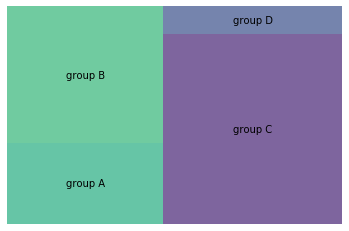

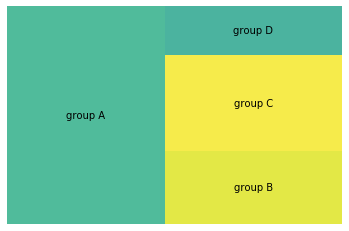

In [72]:
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 
# If you have 2 lists
squarify.plot(sizes=[13,22,35,5], label=["group A", "group B", "group C", "group D"], alpha=.7 )
plt.axis('off')
plt.show()
 
# If you have a data frame?
import pandas as pd
df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()